In [37]:
import igraph as ig
import sys, time, re
from random import randint
import cyrtranslit
import os
import pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline 

from importlib import reload
sys.path.append('../scripts')
sys.path.append('..')
sys.path.append('../scripts_plot')
import ml_utils as utils
import plot_utils as putils
import main
reload(utils)
from plotly.offline import init_notebook_mode
reload(putils)

init_notebook_mode(connected=True)

In [3]:
reload(main)
inst_g = main.read_edges(os.path.join(utils.folder_data, 'inst_lid_rid.csv'))
main.enrich_insta_graph(inst_g)

vk_g = main.read_edges(os.path.join(utils.folder_data, 'vk_lid_rid.csv'))
main.enrich_vk_graph(vk_g)

/home/ildar/projects/pycharm/social_network_revealing/graphmatching/data/inst_lid_rid.csv
IGRAPH UN-- 20794 240414 -- 
+ attr: name (v)
/home/ildar/projects/pycharm/social_network_revealing/graphmatching/data/vk_lid_rid.csv
IGRAPH UN-- 24800 463468 -- 
+ attr: name (v)


### Degree ditribution

/home/ildar/anaconda3/envs/ds/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


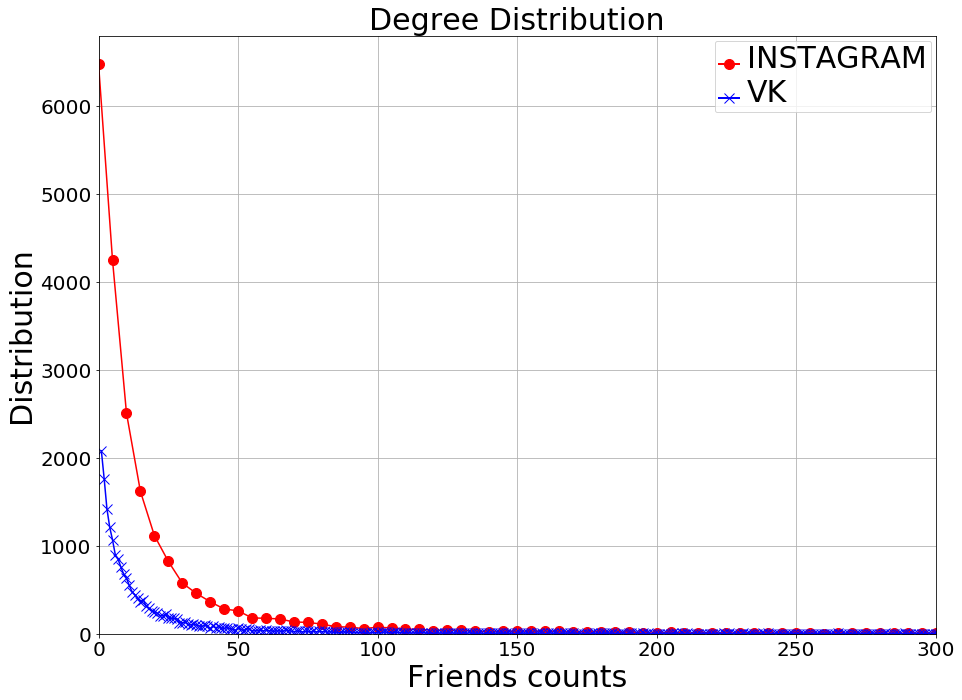

In [3]:
putils.plot_degs(inst_g, vk_g)

### 1st phase precision

In [7]:
scripts_folder = '/home/ildar/projects/pycharm/social_network_revealing/graphmatching/scripts_plot/data_plot'
file_path = os.path.join(scripts_folder, '1phase_results.csv')
df = pd.read_csv(file_path)
# df['wrong'] -= 80
df['precision'] = df['correct'] / (df['correct'] + df['wrong'])
df['recall'] = df['correct'] / 20400.
df.tail()

,threshold,seeds,correct,wrong,is_repeat,precision,recall
49,91,2,4205,194,True,0.955899,0.206127
50,91,3,4222,189,True,0.957153,0.206961
51,91,4,4210,190,True,0.956818,0.206373
52,91,5,4207,195,True,0.955702,0.206225
53,91,6,4197,206,True,0.953214,0.205735


In [8]:
df_rep = df[df['is_repeat'] == True][df['threshold'] > 90]
df_rep = df_rep.sort_values(by = ['threshold', 'seeds'], ascending=[1, 1])
df_rep.head()

,threshold,seeds,correct,wrong,is_repeat,precision,recall
48,91,1,4218,188,True,0.957331,0.206765
49,91,2,4205,194,True,0.955899,0.206127
50,91,3,4222,189,True,0.957153,0.206961
51,91,4,4210,190,True,0.956818,0.206373
52,91,5,4207,195,True,0.955702,0.206225


In [101]:
zvals = df_rep.sort_values(['threshold', 'seeds'])[['threshold', 'seeds', 'precision']]
zvals

,threshold,seeds,precision
48,91,1,0.957331
49,91,2,0.955899
50,91,3,0.957153
51,91,4,0.956818
52,91,5,0.955702
53,91,6,0.953214
42,92,1,0.954705
43,92,2,0.956828
44,92,3,0.952649
45,92,4,0.957492


In [102]:
xvals = df_rep['threshold'].unique()
yvals = df_rep['seeds'].unique()
print(xvals)
print(yvals)
zvals_r = zvals[['precision']].values.reshape((xvals.size, yvals.size))
print(zvals_r)

[91 92 93 94 95 96 97 98 99]
[1 2 3 4 5 6]
[[ 0.95733091  0.95589907  0.95715257  0.95681818  0.95570195  0.95321372]
 [ 0.95470547  0.95682778  0.95264885  0.95749178  0.95474795  0.95613418]
 [ 0.95157264  0.95252374  0.95042352  0.95004995  0.95163301  0.9517017 ]
 [ 0.94756655  0.9477492   0.94851167  0.94886212  0.94875235  0.94818792]
 [ 0.94148021  0.9416142   0.94299628  0.9416142   0.94158076  0.94183381]
 [ 0.93597651  0.93766539  0.9369871   0.93843888  0.93689463  0.93784978]
 [ 0.93709125  0.93345829  0.93666147  0.93634945  0.93476904  0.92914854]
 [ 0.92405523  0.92411038  0.92611373  0.92116788  0.91374955  0.9252811 ]
 [ 0.92321822  0.9235856   0.92121656  0.92282249  0.92600733  0.92251462]]


In [6]:
th_count = df_rep['threshold'].unique().size
shp = (th_count,6)
print(shp)
x = df_rep['threshold'].values.reshape(shp)
y = df_rep['seeds'].values.reshape(shp)
z = df_rep['precision'].values.reshape(shp)
x.shape, x[1]

(9, 6)


((9, 6), array([92, 92, 92, 92, 92, 92]))

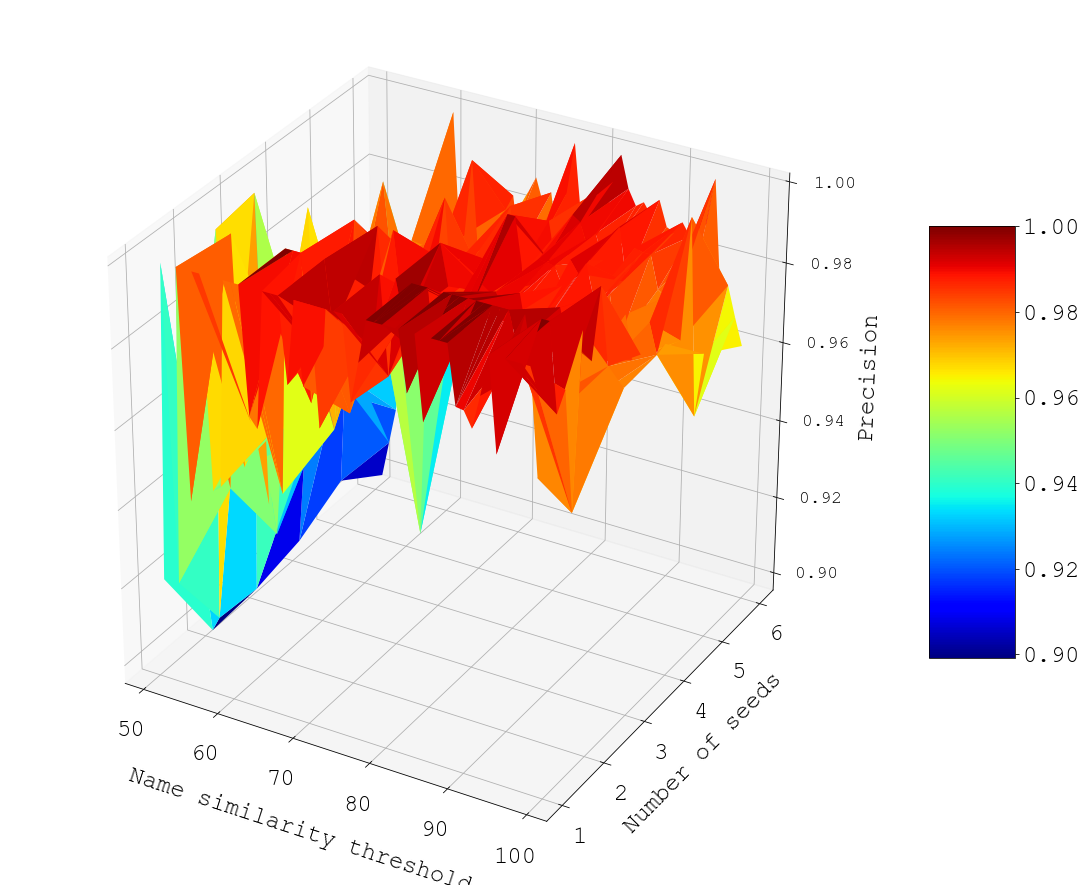

In [78]:
reload(putils)
putils.plot3d(df, name='precision')

In [53]:
import retrieve_results2 as ret
reload(ret)

d = ret.proceed()
df = pd.DataFrame.from_dict(d)
for k in df:
    print(k, len(df[k]))
df = df.rename(index=str, columns={"seed_0": "seeds","Precision": 'precision', 'Recall':'recall'})
df = df.sort_values(['threshold', 'seeds'])
df

F1-score 294
Precision 294
Recall 294
seed_0 294
threshold 294


,F1-score,precision,recall,seeds,threshold
293,0.235120,0.920974,0.134762,1,51
195,0.233335,0.897507,0.134099,2,51
48,0.230825,0.898397,0.132424,3,51
244,0.234866,0.901360,0.135024,4,51
146,0.235654,0.907879,0.135399,5,51
97,0.235552,0.899884,0.135512,6,51
292,0.000025,1.000000,0.000013,1,52
194,0.237190,0.901395,0.136562,2,52
47,0.000075,1.000000,0.000038,3,52
243,0.240013,0.926567,0.137862,4,52


In [93]:
def plot2d_common(df, metric = 'precision'):
    import plotly.offline as py
    from plotly import tools
    import plotly.graph_objs as go

    yvals = sorted(df['threshold'].unique())
    xvals = sorted(df['seeds'].unique())
    zvals = df.sort_values(['threshold', 'seeds'])
    get_z = lambda name: zvals[[name]].values.reshape((len(yvals), len(xvals)))

    name = 'precision'
    trace_precision = go.Heatmap(
        z=get_z(name),
        x=xvals,
        y=yvals,
        name=name.capitalize(),
#         colorbar = dict(x=0.45),s 
    )
    name ='recall'
    trace_recall = go.Heatmap(
        z=get_z(name),
        x=xvals,
        y=yvals,
        name=name.capitalize(),
        colorscale='Viridis',
        
        )
    layout = go.Layout(
        xaxis=dict(
            title='Initial seeds',
            titlefont=dict(
                family='Arial, sans-serif',
                size=25,
#                 color='lightgrey'
                ),
            tickfont=dict(
                family='Old Standard TT, serif',
                size=22,
                color='black'
            ),
        ),
            
        yaxis=dict(
            title='Name similarity threshold',
            titlefont=dict(
                family='Arial, sans-serif',
                size=25,
#                 color='lightgrey'
                ),
            tickfont=dict(
                family='Old Standard TT, serif',
                size=22,
                color='black'
            ),
        ),    
        font = dict(family='Courier New, monospace', size=20, color='black'),
        width=500,
        titlefont = dict(
            size=40,
            color='black'
        )
    )
    if metric == 'precision':
        data = [trace_precision]
        layout.update({'title' : 'Precision'})
    else:
        data = [trace_recall]
        layout.update({'title' : 'Recall'})

    fig = go.Figure(data=data, layout=layout)
    fig.layout.update(layout)
    
    py.iplot(fig)
    
plot2d_common(df, metric='precision')
plot2d_common(df, metric='recall')

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

#First

sns.heatmap(flights, ax=ax1, fmt='d', cmap='gist_gray_r', xticklabels = [""], yticklabels = [""], annot = True, cbar_kws={"orientation": "horizontal"})
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.set_title('Integral')

#Second

sns.heatmap(flights, ax=ax2, fmt='.2f', cmap='gist_gray_r', xticklabels = [""], yticklabels = [""], annot = True, cbar_kws={"orientation": "horizontal"})
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.set_title('Float')

ax1.set_ylabel("Month")
ax1.set_xlabel("Year")
ax2.set_xlabel("Year")

plt.show()

ImportError: No module named 'seaborn'

### Experiment graphics

In [5]:
scripts_folder = '/home/ildar/projects/pycharm/social_network_revealing/graphmatching/scripts_plot/data_plot'
file_path = os.path.join(scripts_folder, 'synthetic_results.csv')
df = pd.read_csv(file_path)
n_common = 73764
df['precision'] = df['correct'] / (df['correct'] + df['wrong'])
df['recall'] = df['correct'] / n_common
df['s'] = df['s'] / 100.
df['f1-score'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])
df.tail()

,t,s,correct,wrong,precision,recall,f1-score
1,90,0.85,50000,1871,0.963930,0.677837,0.795957
2,90,0.80,49979,1871,0.963915,0.677553,0.795755
3,90,0.75,48730,1475,0.970620,0.660620,0.786164
4,90,0.70,47170,1475,0.969678,0.639472,0.770695
5,90,0.60,47076,1464,0.969839,0.638197,0.769819


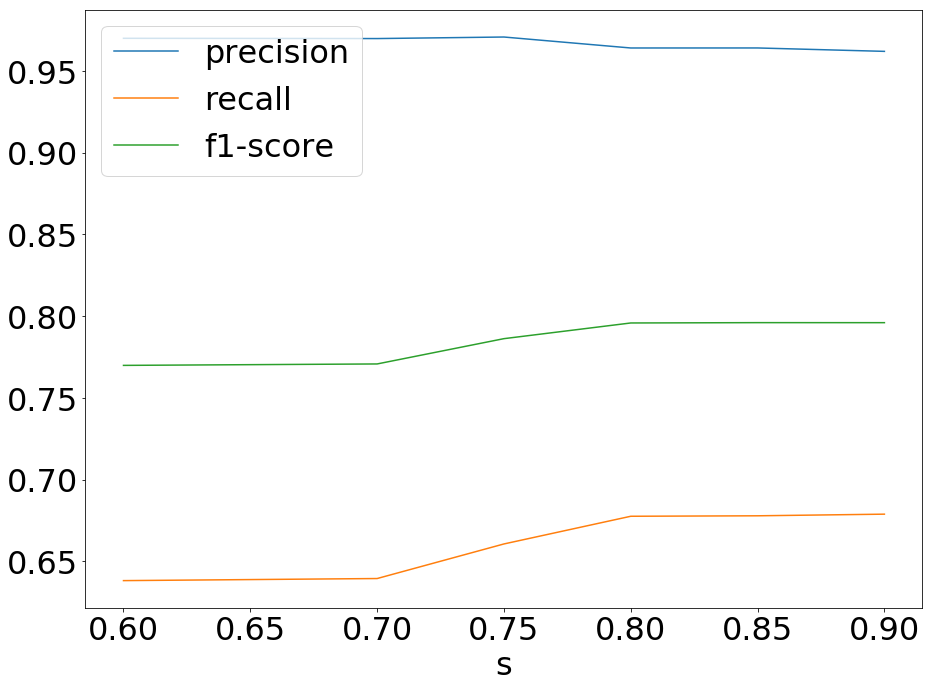

In [9]:
df[['s', 'precision', 'recall', 'f1-score']].plot(x='s')

/home/ildar/anaconda3/envs/ds/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


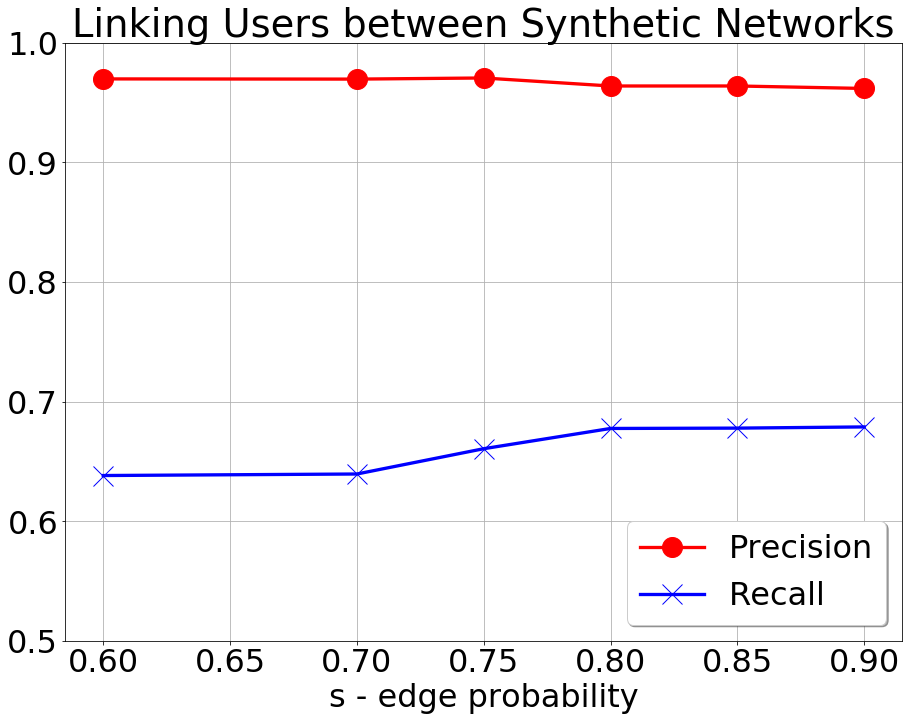

In [10]:
#!/usr/bin/env python
import pylab as pl
import os


OUT_FOLDER_NAME = os.path.join(scripts_folder, '..',  'out')
PLOT_TITLE = 'Linking Users between Synthetic Networks'
DATA_FOLDER_NAME = 'synthetic'
FLG_SAVE_IMG = True
MAX_X = 200
MAX_Y = 25000

def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for row in f:
            a = tuple(float(num) for num in row.split())
            if a[0] <= MAX_X: data.append(a)
    return data


def set_up():
    def set_up_folders():
        check_and_create_foldeer = lambda dname: os.makedirs(dname) if not os.path.exists(dname) else None
        check_and_create_foldeer(OUT_FOLDER_NAME)
        check_and_create_foldeer(os.path.join(OUT_FOLDER_NAME, DATA_FOLDER_NAME))

    if FLG_SAVE_IMG: set_up_folders()


def plot_data():
    pref_gm1 = 'gm1_'
    pref_gm2 = 'gm2_'
    d = {pref_gm1 + 'label': 'Precision',
         pref_gm1 + 'color': 'red',
         pref_gm1 + 'marker': 'o',
         pref_gm2 + 'label': 'Recall',
         pref_gm2 + 'color': 'blue',
         pref_gm2 + 'marker': 'x',
         'xlabel': 's - edge probability'}

    def set_up_plot():
        axes = pl.axes()
        axes.autoscale_view()
        axes.set_title(PLOT_TITLE)
        pl.legend(loc='lower right', fancybox=True, shadow=True)
        pl.ylim(ymin=0.5)
#         pl.xlim(xmin=0)

    def plot_of():
        pl.xlabel(d['xlabel'])
        pl.ylabel(d['ylabel'])
        x = df['s']
        for prefix in (pref_gm1, pref_gm2):
            y = d[prefix + 'y']
            pl.plot(x, y, linewidth=3.3,markersize=20, marker=d[prefix + 'marker'], label=d[prefix + 'label'],
                       color=d[prefix + 'color'])
        set_up_plot()
        pl.grid()
        pl.ylim(ymax=d['ymax'])
        pl.gcf().canvas.set_window_title(d['ylabel'])
        if FLG_SAVE_IMG: pl.savefig(os.path.join(OUT_FOLDER_NAME, DATA_FOLDER_NAME, d['img_name']))
        pl.show()

    def plot_f1_score():
        d.update({
            pref_gm1 + 'y': df['precision'],
            pref_gm2 + 'y': df['recall'],
            'ylabel': '',
            'img_name': 'precision_recall.pdf',
            'ymax': 1})
        plot_of()

    plot_f1_score()

######
# MAIN
######
set_up()
plot_data()